##### Import Required Libraries - 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions


In [20]:
df = pd.read_csv("files/placement.csv")
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0
...,...,...,...,...
95,95,4.3,200,0
96,96,4.4,42,0
97,97,6.7,182,1
98,98,6.3,103,1


In [21]:
df.shape

(100, 4)

##### Steps - 
<p style="color:yellow"># 0. Preprocessing + EDA + Feature Selection</p>
<p style="color:yellow"># 1. Extract Input and Output Columns</p>
<p style="color:yellow"># 2. Scale The Values</p>
<p style="color:yellow"># 3. Train Test Split</p>
<p style="color:yellow"># 4. Train The Model</p>
<p style="color:yellow"># 5. Evaluate the Model/Model Selection</p>
<p style="color:yellow"># 6. Deploy The Model</p>


##### 0. Preprocesing + EDA + Feature Selection

In [22]:
df = df.iloc[:,1:]

In [23]:
df.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


Text(0, 0.5, 'iq')

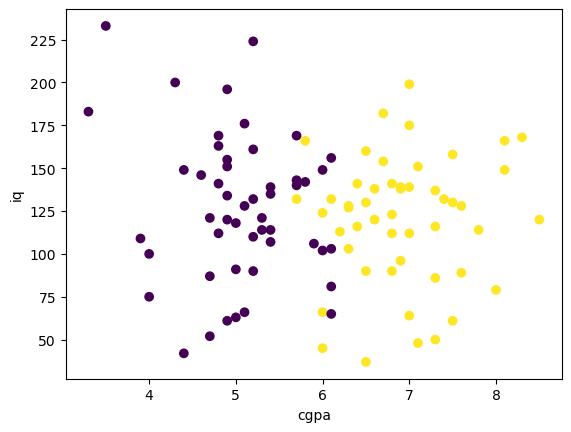

In [24]:
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])
plt.xlabel("cgpa")
plt.ylabel("iq")

##### 1. Extract Input and Output Columns

In [25]:
X = df.iloc[:,0:2]
Y = df.iloc[:,2:]

In [26]:
X.head()
Y.head()

,placement
0,1
1,0
2,0
3,1
4,0


##### Train Test Split

In [27]:
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size=0.1)
X_train
X_test
Y_train
Y_test

,placement
18,0
94,0
4,0
16,0
3,1
9,0
6,0
25,0
38,1
73,0


##### Scale The Values

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.92169419, -1.6022173 ],
       [-0.65918635, -0.26921433],
       [-0.57168374,  0.3842185 ],
       [-1.44670987,  0.64559164],
       [-2.23423338,  2.84112594],
       [-0.04666806, -2.07268894],
       [ 0.21583978, -0.55672477],
       [-0.83419158,  1.35129909],
       [ 0.65335284, -0.03397851],
       [-0.57168374, -0.26921433],
       [-0.3091759 ,  1.1683379 ],
       [-0.04666806,  0.64559164],
       [ 1.35337375,  0.09670806],
       [ 0.390845  , -0.89650984],
       [ 1.09086591, -1.94200237],
       [ 0.74085546, -0.73968596],
       [ 0.47834762,  0.35808119],
       [-1.18420203, -0.08625313],
       [-1.18420203, -0.97492178],
       [ 0.21583978,  0.07057075],
       [ 0.04083455, -0.55672477],
       [-0.13417067, -0.47831283],
       [-0.74668896, -0.37376358],
       [ 1.7033842 , -1.18402029],
       [ 0.91586068, -1.994277  ],
       [-1.44670987, -2.15110087],
       [-0.04666806, -0.00784119],
       [-0.83419158,  0.09670806],
       [ 0.04083455,

In [30]:
X_test = scaler.transform(X_test)

In [31]:
X_test

array([[-1.79672032, -0.63513671],
       [-1.18420203, -1.88972774],
       [-0.22167329,  0.46263044],
       [-0.74668896,  2.60589012],
       [ 1.17836852,  0.20125731],
       [-0.83419158, -1.52380536],
       [-0.3091759 ,  0.48876776],
       [-0.92169419, -0.87037253],
       [ 0.390845  ,  0.93310208],
       [-1.0091968 , -1.65449192]])

##### Model Training - 

In [32]:
clf = LogisticRegression()

In [33]:
clf.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

##### Evaluate the Model

In [40]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [35]:
Y_test

,placement
18,0
94,0
4,0
16,0
3,1
9,0
6,0
25,0
38,1
73,0


In [36]:
accuracy_score(Y_test,y_pred)

1.0

<Axes: >

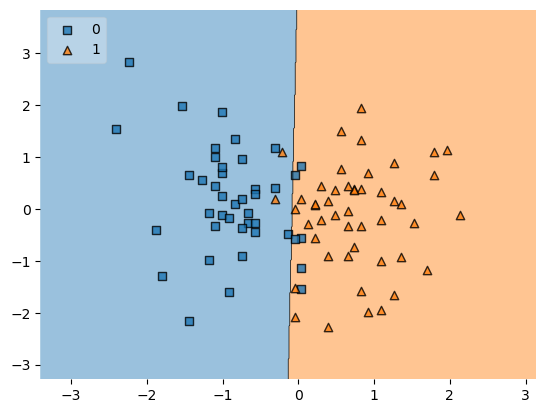

In [37]:
plot_decision_regions(X_train,Y_train["placement"].values,clf=clf,legend=2)

In [38]:
import pickle

In [39]:
pickle.dump(clf,open('model.pk1','wb'))